**Business Understanding**

This project aims to provide an in-depth analysis of the COVID-19 situation in Mexico and develop a machine learning-based model to predict new cases of the virus. By leveraging historical data on COVID-19 cases, the project seeks to identify trends, patterns, and potential correlations with various factors that may contribute to the spread of the virus. The insights gained from this analysis and the predictive model will help inform public health policies and strategies for better managing and mitigating the impact of the pandemic.

**Data Understanding**

The data was extracted from the Government of Mexico's ministry of Health national data repository. The data conatins 10,000 rows with 22 columns. 
The target variable for modelling is **['covid_res']** and predictor variables after preprocessing the data areas listed:
**['sex', 'patient_type','month_name',
'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
'icu','dead','age_groups']**

**Objective**

The primary objective of this project is to develop a machine learning-based forecasting model for predicting new COVID-19 cases in Mexico. The model will be trained on the provided dataset described above and will consider various factors, such as demographic information, socioeconomic indicators, and public health interventions. The project will also aim to:

* Conduct Exploratory Data Analysis: Analyze the COVID-19 situation in Mexico, identifying trends and patterns in the spread of the virus.
* Investigate potential correlations between different factors and the number of new COVID-19 cases.
* Evaluate and compare  the performance of the developed Machine learning models .
* Provide actionable insights and recommendations to inform public health policies and strategies for controlling the spread of COVID-19 in Mexico.

**Importing the libraries for loading and exploring the data**

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

**Loading the data**

In [355]:
df = pd.read_excel('covid_mexico_data.xlsx', index_col=0)
df

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
id,,,,,,,,,,,,,,,,,,,,,
0dd249,Male,Outpatient,24-05-2020,18-05-2020,NaN,NaN,Yes,29,NaN,No,...,No,No,No,No,No,No,Yes,Yes,Negative,NaN
0957d9,Female,Outpatient,18-06-2020,16-06-2020,NaN,NaN,No,45,No,No,...,No,No,No,No,No,No,No,NaN,Negative,NaN
0ad2eb,Female,Outpatient,11-05-2020,11-05-2020,NaN,NaN,No,25,No,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN
1646ba,Female,Outpatient,24-06-2020,19-06-2020,NaN,NaN,No,11,No,No,...,No,No,No,No,No,No,No,Yes,Positive,NaN
1e31dd,Male,Outpatient,17-05-2020,16-05-2020,NaN,NaN,No,28,NaN,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1b5791,Male,Outpatient,16-06-2020,15-06-2020,NaN,NaN,No,43,NaN,No,...,No,No,No,No,No,No,No,No,Negative,NaN
15b33c,Male,Inpatient,05-05-2020,24-04-2020,NaN,No,Yes,31,NaN,No,...,No,No,No,No,No,No,No,No,Positive,No
14fa3f,Male,Outpatient,26-05-2020,22-05-2020,NaN,NaN,No,24,NaN,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN


**Previewing tha data**

In [356]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
id,,,,,,,,,,,,,,,,,,,,,
0dd249,Male,Outpatient,24-05-2020,18-05-2020,NaN,NaN,Yes,29,NaN,No,...,No,No,No,No,No,No,Yes,Yes,Negative,NaN
0957d9,Female,Outpatient,18-06-2020,16-06-2020,NaN,NaN,No,45,No,No,...,No,No,No,No,No,No,No,NaN,Negative,NaN
0ad2eb,Female,Outpatient,11-05-2020,11-05-2020,NaN,NaN,No,25,No,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN
1646ba,Female,Outpatient,24-06-2020,19-06-2020,NaN,NaN,No,11,No,No,...,No,No,No,No,No,No,No,Yes,Positive,NaN
1e31dd,Male,Outpatient,17-05-2020,16-05-2020,NaN,NaN,No,28,NaN,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN


In [357]:
df.tail()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
id,,,,,,,,,,,,,,,,,,,,,
1b5791,Male,Outpatient,16-06-2020,15-06-2020,NaN,NaN,No,43,NaN,No,...,No,No,No,No,No,No,No,No,Negative,NaN
15b33c,Male,Inpatient,05-05-2020,24-04-2020,NaN,No,Yes,31,NaN,No,...,No,No,No,No,No,No,No,No,Positive,No
14fa3f,Male,Outpatient,26-05-2020,22-05-2020,NaN,NaN,No,24,NaN,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN
09e1c3,Female,Outpatient,08-05-2020,05-05-2020,NaN,NaN,No,42,No,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN
16d40b,Female,Outpatient,16-04-2020,16-04-2020,NaN,NaN,No,24,No,No,...,No,No,No,No,No,No,No,No,Negative,NaN


In [358]:
df.shape

(10000, 22)

In [359]:
df.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0dd249 to 16d40b
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sex                  10000 non-null  object
 1   patient_type         10000 non-null  object
 2   entry_date           10000 non-null  object
 3   date_symptoms        10000 non-null  object
 4   date_died            639 non-null    object
 5   intubed              2137 non-null   object
 6   pneumonia            9999 non-null   object
 7   age                  10000 non-null  int64 
 8   pregnancy            4841 non-null   object
 9   diabetes             9965 non-null   object
 10  copd                 9969 non-null   object
 11  asthma               9968 non-null   object
 12  inmsupr              9966 non-null   object
 13  hypertension         9968 non-null   object
 14  other_disease        9956 non-null   object
 15  cardiovascular       9966 non-null   object
 16  obe

   **Step 1: Data Preparation**

* **Data Types Conversions from Object to DateTime**

In [361]:
df['entry_date']= pd.to_datetime(df['entry_date'])
df['date_symptoms']= pd.to_datetime(df['date_symptoms'])
df['date_died']= pd.to_datetime(df['date_died'])

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0dd249 to 16d40b
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   sex                  10000 non-null  object        
 1   patient_type         10000 non-null  object        
 2   entry_date           10000 non-null  datetime64[ns]
 3   date_symptoms        10000 non-null  datetime64[ns]
 4   date_died            639 non-null    datetime64[ns]
 5   intubed              2137 non-null   object        
 6   pneumonia            9999 non-null   object        
 7   age                  10000 non-null  int64         
 8   pregnancy            4841 non-null   object        
 9   diabetes             9965 non-null   object        
 10  copd                 9969 non-null   object        
 11  asthma               9968 non-null   object        
 12  inmsupr              9966 non-null   object        
 13  hypertension         9968 non-

   * **Detecting and dealing with Missing Values**

In [363]:
df.isnull().sum()

sex                       0
patient_type              0
entry_date                0
date_symptoms             0
date_died              9361
intubed                7863
pneumonia                 1
age                       0
pregnancy              5159
diabetes                 35
copd                     31
asthma                   32
inmsupr                  34
hypertension             32
other_disease            44
cardiovascular           34
obesity                  31
renal_chronic            33
tobacco                  34
contact_other_covid    3107
covid_res                 0
icu                    7863
dtype: int64

In [364]:
df.isna().sum()

sex                       0
patient_type              0
entry_date                0
date_symptoms             0
date_died              9361
intubed                7863
pneumonia                 1
age                       0
pregnancy              5159
diabetes                 35
copd                     31
asthma                   32
inmsupr                  34
hypertension             32
other_disease            44
cardiovascular           34
obesity                  31
renal_chronic            33
tobacco                  34
contact_other_covid    3107
covid_res                 0
icu                    7863
dtype: int64

* **Imputing all categorical variables with the mode**

In [365]:
df['intubed']=df['intubed'].fillna(df['intubed'].mode()[0])
df['pregnancy']=df['pregnancy'].fillna(df['pregnancy'].mode()[0])
df['contact_other_covid']=df['contact_other_covid'].fillna(df['contact_other_covid'].mode()[0])
df['pneumonia']=df['pneumonia'].fillna(df['pneumonia'].mode()[0])
df['diabetes']=df['diabetes'].fillna(df['diabetes'].mode()[0])
df['icu']=df['icu'].fillna(df['icu'].mode()[0])
df['copd']=df['copd'].fillna(df['copd'].mode()[0])
df['asthma']=df['asthma'].fillna(df['copd'].mode()[0])
df['inmsupr']=df['inmsupr'].fillna(df['inmsupr'].mode()[0])
df['hypertension']=df['hypertension'].fillna(df['hypertension'].mode()[0])
df['other_disease']=df['other_disease'].fillna(df['other_disease'].mode()[0])
df['cardiovascular']=df['cardiovascular'].fillna(df['cardiovascular'].mode()[0])
df['obesity']=df['obesity'].fillna(df['obesity'].mode()[0])
df['renal_chronic']=df['renal_chronic'].fillna(df['renal_chronic'].mode()[0])
df['tobacco']=df['tobacco'].fillna(df['tobacco'].mode()[0])

In [366]:
df.isna().sum()

sex                       0
patient_type              0
entry_date                0
date_symptoms             0
date_died              9361
intubed                   0
pneumonia                 0
age                       0
pregnancy                 0
diabetes                  0
copd                      0
asthma                    0
inmsupr                   0
hypertension              0
other_disease             0
cardiovascular            0
obesity                   0
renal_chronic             0
tobacco                   0
contact_other_covid       0
covid_res                 0
icu                       0
dtype: int64

In [367]:
df.isna().sum()

sex                       0
patient_type              0
entry_date                0
date_symptoms             0
date_died              9361
intubed                   0
pneumonia                 0
age                       0
pregnancy                 0
diabetes                  0
copd                      0
asthma                    0
inmsupr                   0
hypertension              0
other_disease             0
cardiovascular            0
obesity                   0
renal_chronic             0
tobacco                   0
contact_other_covid       0
covid_res                 0
icu                       0
dtype: int64

  * **Checking for and removing duplicates**

In [368]:
df.duplicated().sum()

79

In [369]:
df.drop_duplicates( inplace=True, keep = 'first')

In [370]:
# Check for duplicates in the entire DataFrame
duplicates = df[df.duplicated()]

# If 'duplicates' DataFrame is not empty, it means there are duplicate rows in 'df'
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found")

No duplicate rows found


  * **Cleaning variations of Males & females**

In [371]:
df.duplicated().sum()

0

In [372]:
df.nunique()

sex                      4
patient_type             2
entry_date             140
date_symptoms          145
date_died               87
intubed                  2
pneumonia                2
age                    110
pregnancy                2
diabetes                 2
copd                     2
asthma                   2
inmsupr                  2
hypertension             2
other_disease            2
cardiovascular           2
obesity                  2
renal_chronic            2
tobacco                  2
contact_other_covid      2
covid_res                3
icu                      2
dtype: int64

In [373]:
df['sex'].value_counts()

Male       5035
Female     4723
Femalee     111
Males        52
Name: sex, dtype: int64

In [374]:
df['sex']=df['sex'].replace({'Males': 'Male','Femalee':'Female'})

In [375]:
df['sex'].value_counts()

Male      5087
Female    4834
Name: sex, dtype: int64

  * **Checking for Outliers and handling them**

In [376]:
df.describe()

,age
count,9921.000000
mean,42.829957
std,19.682884
min,-67.000000
25%,31.000000
50%,41.000000
75%,53.000000
max,856.000000


Filtering out -ve ages and ages above 90

In [377]:
df_filtered = df[(df['age']>=0)&(df['age']<=100)]

In [378]:
df_filtered.describe()

,age
count,9912.000000
mean,42.664952
std,16.847007
min,0.000000
25%,31.000000
50%,41.000000
75%,53.000000
max,100.000000


In [379]:
df_filtered.shape

(9912, 22)

* **Exporting Cleaned dataset**

In [380]:
df_filtered.to_csv('Cleaned_df.csv',index=False)

**Step 2: Data Exploration(EDA)**

In [381]:
df = df_filtered

**Feature Engineering**

* Creating a column called dead
* creating a column called age_groups

In [382]:
# Create a new column 'dead' indicating whether a person is dead
df['dead'] = df['date_died'].apply(lambda x: 'Yes' if pd.notnull(x) else 'No')

# Define age ranges and labels
age_bins = [0, 18, 30, 50, 70, 90, float('inf')]
age_labels = ['0-17', '18-29', '30-49', '50-69', '70-89', '90+']

# Create 'age_groups' column based on age ranges
df['age_groups'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [383]:
df['date_symptoms'] = pd.to_datetime(df['date_symptoms'], errors='coerce')
df['symptom_month'] = df['date_symptoms'].dt.month

**Univariate Analysis**

In [384]:
df.describe()

,age,symptom_month
count,9912.000000,9912.000000
mean,42.664952,5.667272
std,16.847007,2.388565
min,0.000000,1.000000
25%,31.000000,4.000000
50%,41.000000,5.000000
75%,53.000000,6.000000
max,100.000000,12.000000


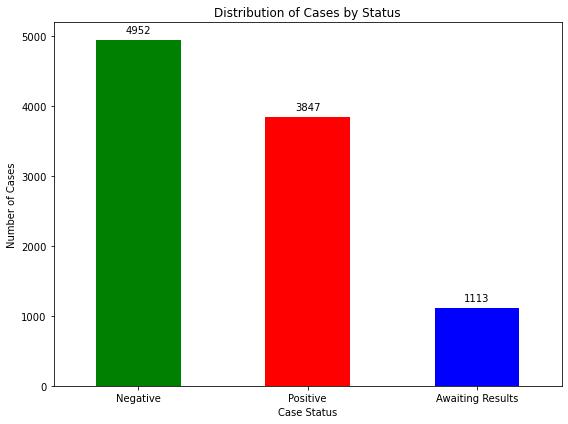

In [385]:
# Plotting
plt.figure(figsize=(8, 6))
ax=df['covid_res'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])

# Adding labels and title
plt.xlabel('Case Status')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Status')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

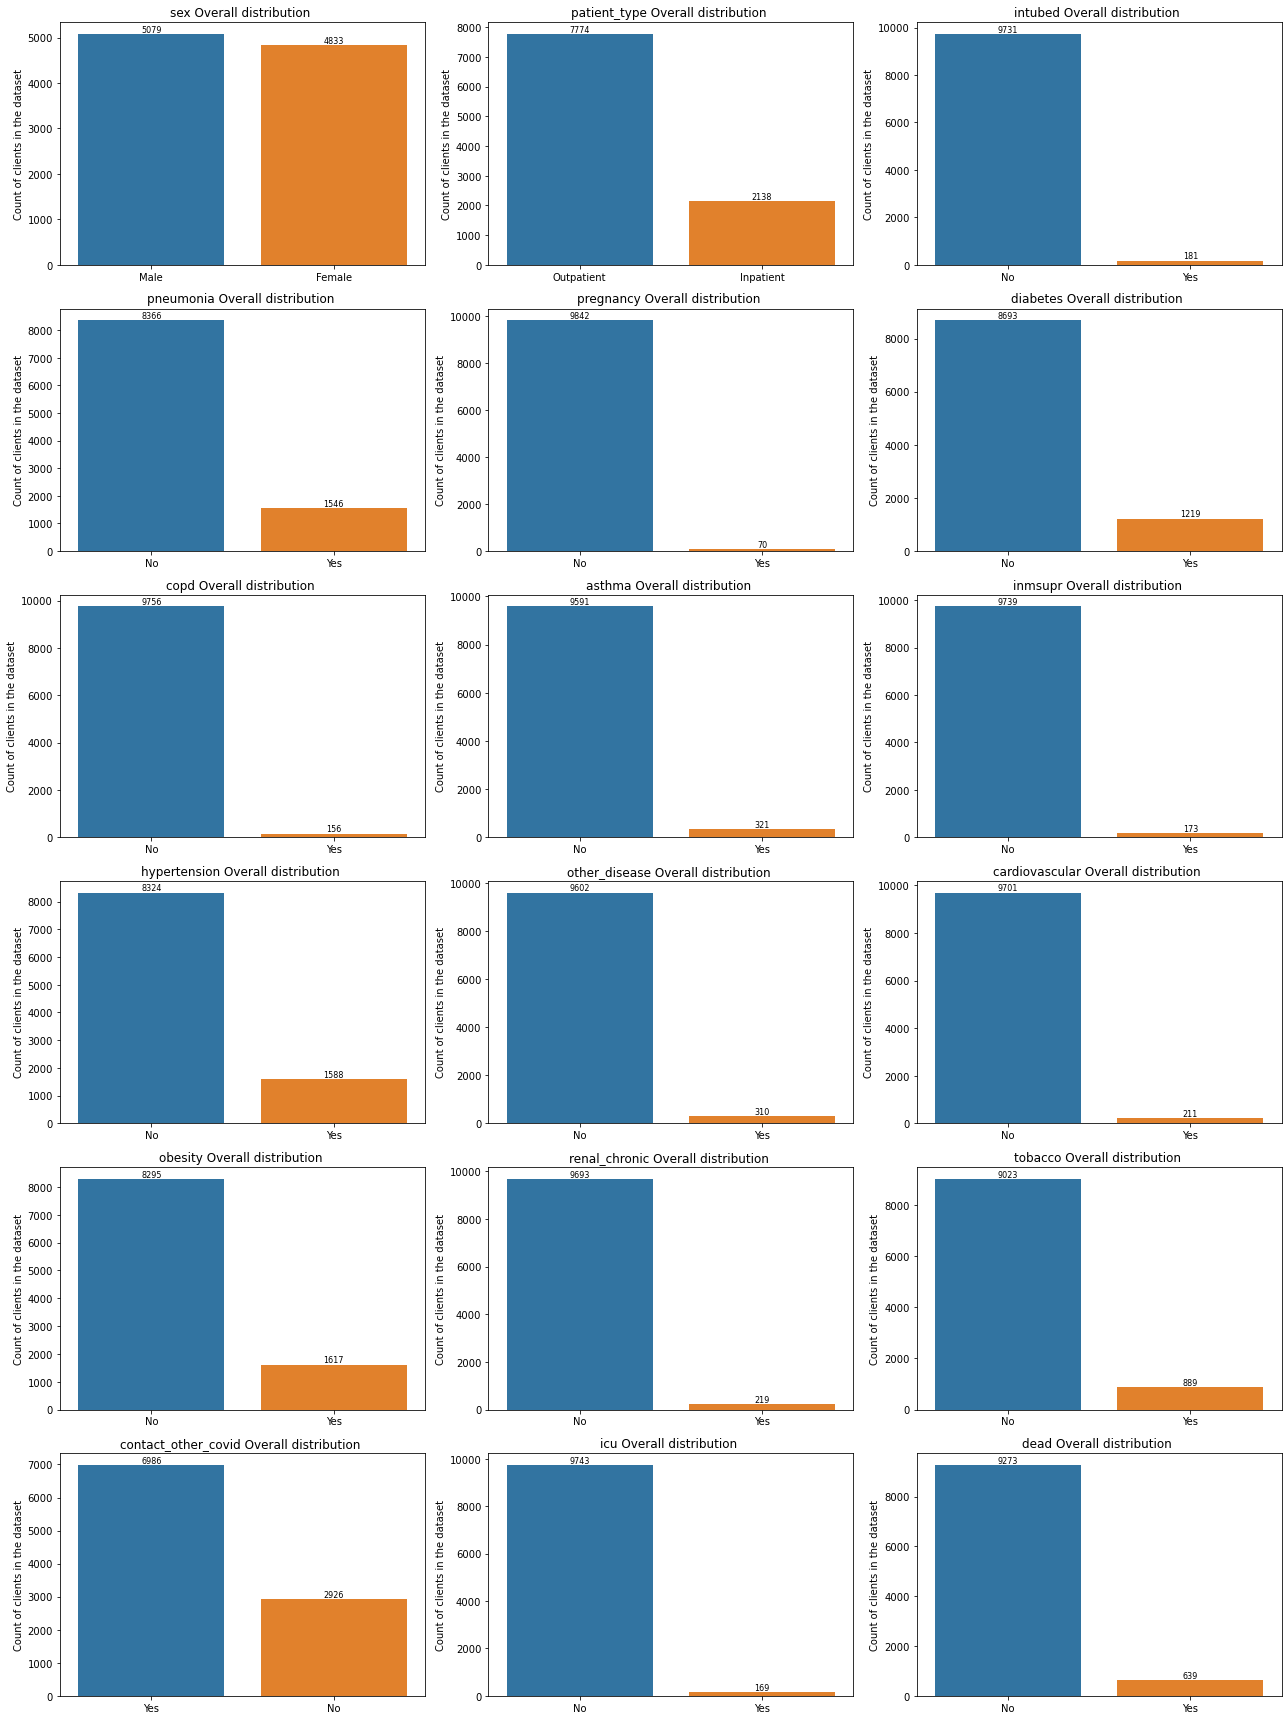

In [386]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define binary categorical variables
binary_categorical_vars = ['sex','patient_type','intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma',
                           'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
                           'tobacco', 'contact_other_covid', 'icu','dead']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each binary categorical variable
for i, var in enumerate(binary_categorical_vars):
    # Calculate counts of each category in the variable
    counts = df[var].value_counts()

    # Sort counts in descending order
    counts = counts.sort_values(ascending=False)

    # Plot the count of each category in the variable
    ax = sns.countplot(x=var, data=df, ax=axes[i], order=counts.index)
    axes[i].set_title(f'{var} Overall distribution ')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count of clients in the dataset')

    # Add data labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Remove any unused axes
for j in range(len(binary_categorical_vars), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


**Bivariate Analysis**

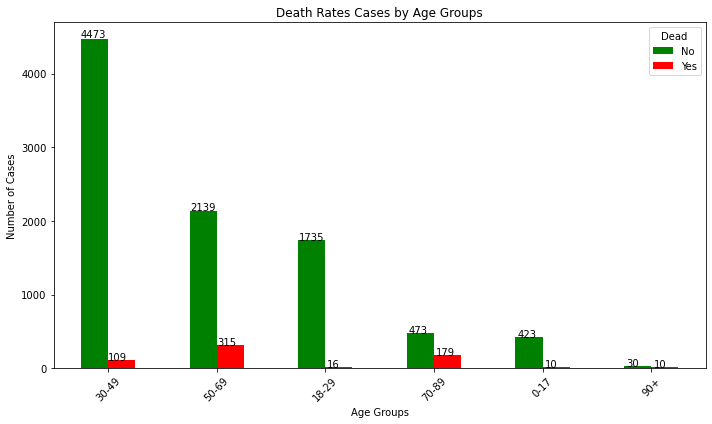

In [387]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by age range and count the number of deaths
death_ranges = df.groupby(['age_groups', 'dead']).size().unstack(fill_value=0)

# Sort by sum of deaths for each age group
death_ranges_sum = death_ranges.sum(axis=1)
death_ranges_sorted = death_ranges_sum.sort_values(ascending=False)
death_ranges_sorted_index = death_ranges_sorted.index

# Reorder the rows based on the sorted index
death_ranges_sorted = death_ranges.reindex(death_ranges_sorted_index)

# Plotting
ax = death_ranges_sorted.plot(kind='bar', stacked=False, figsize=(10, 6), color=['green', 'red'])

# Adding data labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Adding labels and title
plt.xlabel('Age Groups')
plt.ylabel('Number of Cases')
plt.title('Death Rates Cases by Age Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Dead', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


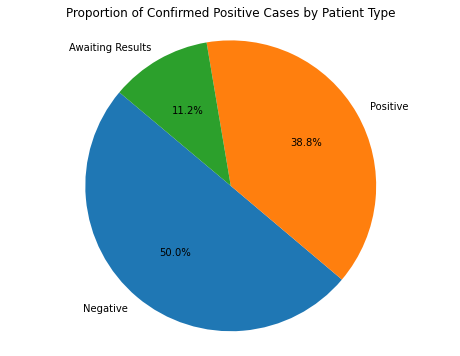

In [388]:
Outpatient_counts = df['covid_res'].value_counts()
total_positive_cases = Outpatient_counts.sum()

plt.figure(figsize=(8, 6))
plt.pie(Outpatient_counts, labels=Outpatient_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Cases by status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

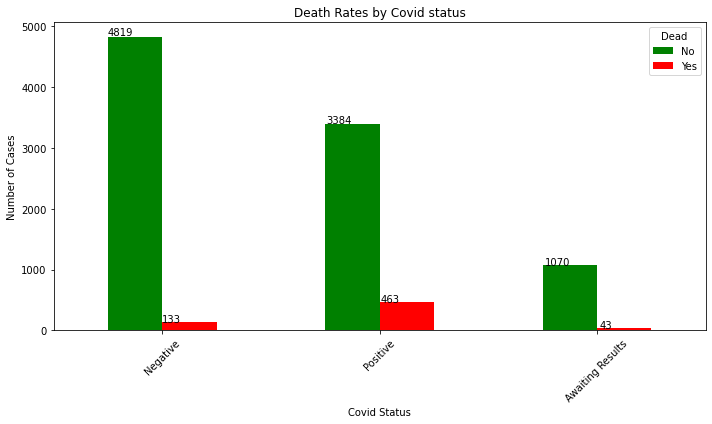

In [389]:
# Group by Covid status and death status, and count the number of cases
death_counts = df.groupby(['covid_res', 'dead']).size().unstack(fill_value=0)

# Sort by sum of deaths for each Covid status
death_counts_sum = death_counts.sum(axis=1)
death_counts_sorted = death_counts_sum.sort_values(ascending=False)
death_counts_sorted_index = death_counts_sorted.index

# Reorder the rows based on the sorted index
death_counts_sorted = death_counts.reindex(death_counts_sorted_index)

# Plotting
ax = death_counts_sorted.plot(kind='bar', stacked=False, figsize=(10, 6), color=['green', 'red'])

# Adding data labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Adding labels and title
plt.xlabel('Covid Status')
plt.ylabel('Number of Cases')
plt.title('Death Rates by Covid status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Dead', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


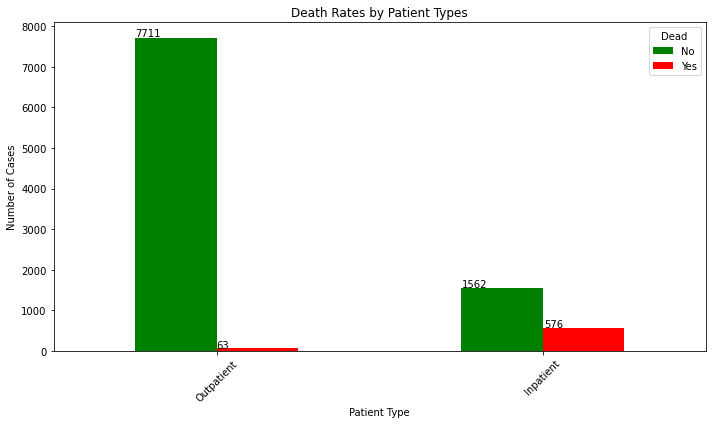

In [390]:
# Group by patient type and death status, and count the number of cases
death_counts = df.groupby(['patient_type', 'dead']).size().unstack(fill_value=0)

# Sort by sum of deaths for each patient type
death_counts_sum = death_counts.sum(axis=1)
death_counts_sorted = death_counts_sum.sort_values(ascending=False)
death_counts_sorted_index = death_counts_sorted.index

# Reorder the rows based on the sorted index
death_counts_sorted = death_counts.reindex(death_counts_sorted_index)

# Plotting
ax = death_counts_sorted.plot(kind='bar', stacked=False, figsize=(10, 6), color=['green', 'red'])

# Adding data labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Adding labels and title
plt.xlabel('Patient Type')
plt.ylabel('Number of Cases')
plt.title('Death Rates by Patient Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Dead', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

In [391]:
# Convert dates to month-year format
df['date_symptoms'] = df['date_symptoms'].dt.strftime('%Y-%m')
df['date_died'] = df['date_died'].dt.strftime('%Y-%m')

In [392]:
import calendar
# Extract month names from 'date_symptoms' column
def extract_month_name(date_str):
    try:
        year, month = date_str.split('-')
        return calendar.month_name[int(month)]
    except (ValueError, IndexError):
        return 'Unknown'

df['month_name'] = df['date_symptoms'].apply(extract_month_name)

# Display the DataFrame
print(df)


           sex patient_type entry_date date_symptoms date_died intubed  \
id                                                                       
0dd249    Male   Outpatient 2020-05-24       2020-05       NaN      No   
0957d9  Female   Outpatient 2020-06-18       2020-06       NaN      No   
0ad2eb  Female   Outpatient 2020-11-05       2020-11       NaN      No   
1646ba  Female   Outpatient 2020-06-24       2020-06       NaN      No   
1e31dd    Male   Outpatient 2020-05-17       2020-05       NaN      No   
...        ...          ...        ...           ...       ...     ...   
1b5791    Male   Outpatient 2020-06-16       2020-06       NaN      No   
15b33c    Male    Inpatient 2020-05-05       2020-04       NaN      No   
14fa3f    Male   Outpatient 2020-05-26       2020-05       NaN      No   
09e1c3  Female   Outpatient 2020-08-05       2020-05       NaN      No   
16d40b  Female   Outpatient 2020-04-16       2020-04       NaN      No   

       pneumonia  age pregnancy diabe

 **Analyzing positive cases**

In [393]:
# Filtering data to only those who are positive_COVID

positive_cases = df[df['covid_res']=='Positive']
positive_cases

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,dead,age_groups,symptom_month,month_name
id,,,,,,,,,,,,,,,,,,,,,
1646ba,Female,Outpatient,2020-06-24,2020-06,NaN,No,No,11,No,No,...,No,No,No,Yes,Positive,No,No,0-17,6,June
107c1f,Female,Outpatient,2020-08-06,2020-06,NaN,No,No,28,No,No,...,No,No,No,No,Positive,No,No,18-29,6,June
13627c,Male,Inpatient,2020-05-17,2020-05,2020-06,No,No,47,No,Yes,...,No,No,No,Yes,Positive,No,Yes,30-49,5,May
010d87,Female,Outpatient,2020-04-05,2020-04,NaN,No,No,46,No,No,...,Yes,No,No,Yes,Positive,No,No,30-49,4,April
19511b,Male,Outpatient,2020-03-30,2020-03,NaN,No,No,28,No,No,...,No,No,No,Yes,Positive,No,No,18-29,3,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0b5f03,Female,Outpatient,2020-04-29,2020-04,NaN,No,No,42,No,No,...,No,No,No,Yes,Positive,No,No,30-49,4,April
1886ee,Male,Outpatient,2020-05-25,2020-05,NaN,No,No,57,No,Yes,...,Yes,No,No,No,Positive,No,No,50-69,5,May
179ad8,Female,Outpatient,2020-06-13,2020-02,NaN,No,No,30,No,No,...,No,No,No,Yes,Positive,No,No,30-49,2,February


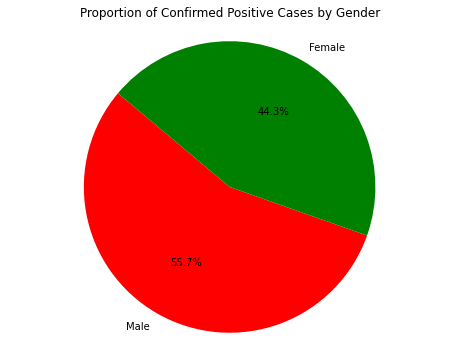

In [394]:
gender_counts = positive_cases['sex'].value_counts()
total_positive_cases = gender_counts.sum()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Proportion of Confirmed Positive Cases by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

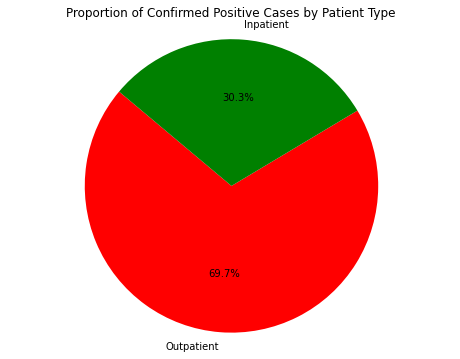

In [395]:
Outpatient_counts = positive_cases['patient_type'].value_counts()
total_positive_cases = Outpatient_counts.sum()

plt.figure(figsize=(8, 6))
plt.pie(Outpatient_counts, labels=Outpatient_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Proportion of Confirmed Positive Cases by Patient Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [396]:
positive_cases.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu', 'dead', 'age_groups', 'symptom_month',
       'month_name'],
      dtype='object')

In [397]:
# Convert 'date_symptoms' column to datetime format
df['date_symptoms'] = pd.to_datetime(df['date_symptoms'], errors='coerce')

# Convert dates to month-year format
df['date_symptoms'] = df['date_symptoms'].dt.strftime('%Y-%m')

# Check the first few rows to ensure the conversion worked
# print(df.head())

In [398]:
positive_cases['date_symptoms'] = pd.to_datetime(positive_cases['date_symptoms'], errors='coerce')

# Convert dates to month-year format
positive_cases['date_symptoms'] = positive_cases['date_symptoms'].dt.strftime('%Y-%m')

**Trend analysis on deaths and symptom dates**

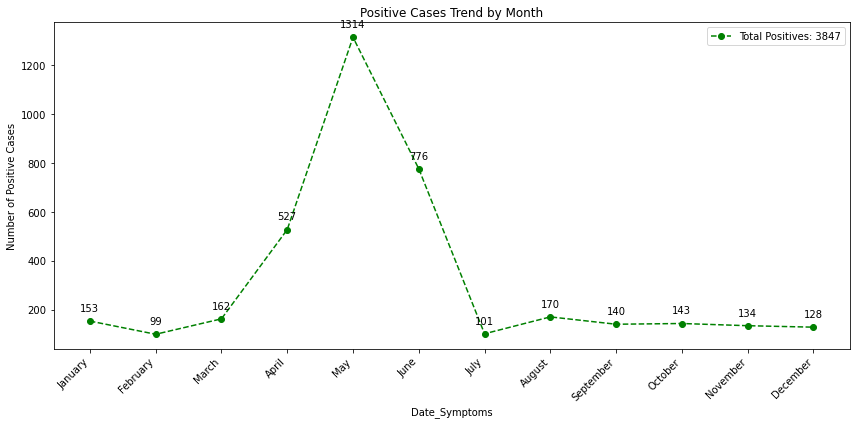

In [399]:
# Extract month names from 'date_symptoms' column
def extract_month_name(date_str):
    try:
        year, month = date_str.split('-')
        return calendar.month_name[int(month)]
    except (ValueError, IndexError):
        return 'Unknown'

positive_cases['month_name'] = positive_cases['date_symptoms'].apply(extract_month_name)

# Group by month_name and count positive cases for each month
trend = positive_cases.groupby('month_name').size()

# Total number of positive cases
total_positives = trend.sum()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the data
trend = trend.reindex(month_order)

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(trend.index, trend.values, marker='o', color='green', linestyle='--', label=f'Total Positives: {total_positives}')
plt.title('Positive Cases Trend by Month')
plt.xlabel('Date_Symptoms')
plt.ylabel('Number of Positive Cases')
plt.xticks(rotation=45, ha='right')

# Label the data points
for i, txt in enumerate(trend.values):
    plt.annotate(txt, (trend.index[i], trend.values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.tight_layout()
plt.show()

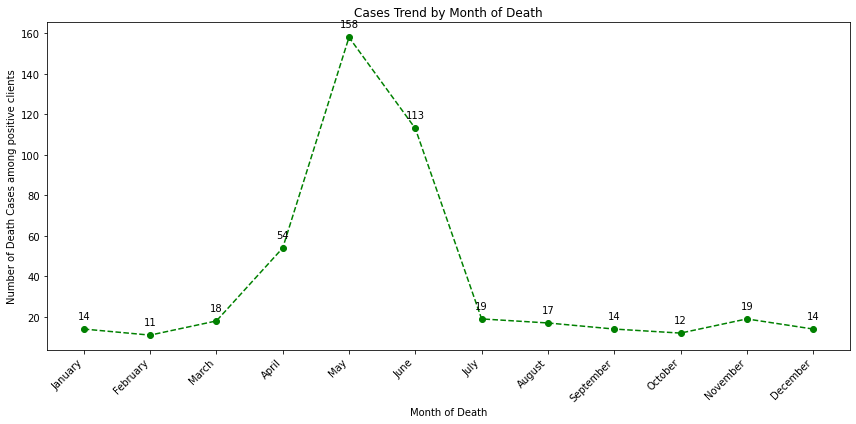

In [400]:
# Extract month names from 'date_died' column
def extract_month_name(date_str):
    try:
        if isinstance(date_str, str):  # Check if the value is a string
            year, month = date_str.split('-')
            return calendar.month_name[int(month)]
        else:
            return 'Unknown'
    except (ValueError, IndexError):
        return 'Unknown'

positive_cases['month_name'] = positive_cases['date_died'].apply(extract_month_name)

# Group by month_name and count cases for each month
trend = positive_cases.groupby('month_name').size()

# Total number of cases
total_cases = trend.sum()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the data
trend = trend.reindex(month_order)

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(trend.index, trend.values, marker='o', color='green', linestyle='--')
plt.title('Cases Trend by Month of Death')
plt.xlabel('Month of Death')
plt.ylabel('Number of Death Cases among positive clients')
plt.xticks(rotation=45, ha='right')

# Label the data points
for i, txt in enumerate(trend.values):
    plt.annotate(txt, (trend.index[i], trend.values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# plt.legend()
plt.tight_layout()
plt.show()

**Multivariate Analysis**

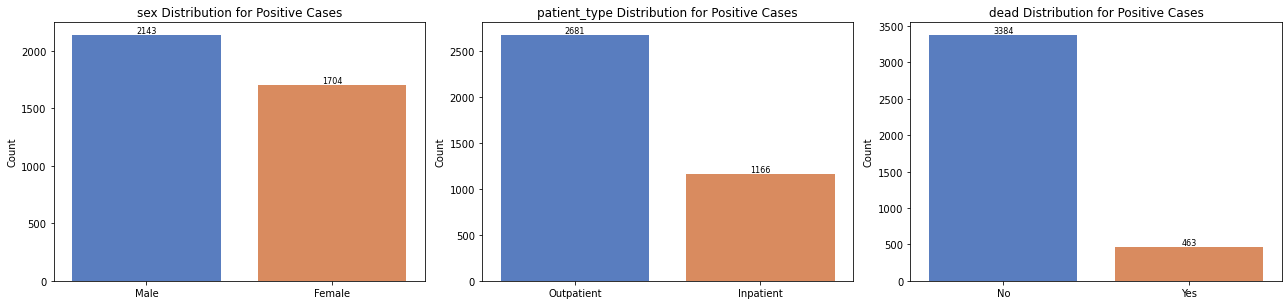

In [401]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define binary categorical variables
binary_categorical_vars = ['sex', 'patient_type', 'dead']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each binary categorical variable
for i, var in enumerate(binary_categorical_vars):
    # Calculate counts of each category in the variable
    counts = positive_cases[var].value_counts()

    # Sort counts in descending order
    counts = counts.sort_values(ascending=False)

    # Plot the count of each category in the variable
    ax = sns.countplot(x=var, data=positive_cases, ax=axes[i], order=counts.index, palette='muted')
    axes[i].set_title(f'{var} Distribution for Positive Cases')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

    # Add data labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Remove any unused axes
for j in range(len(binary_categorical_vars), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


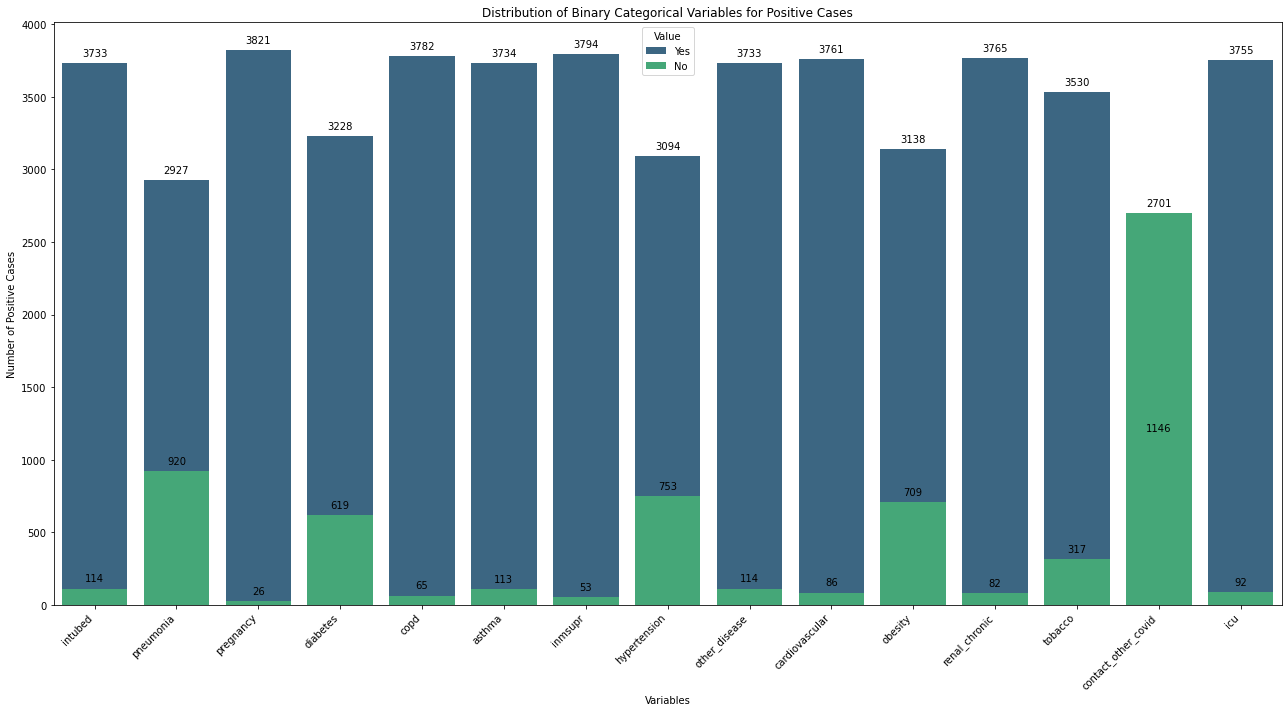

In [402]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the variables and 'positive_cases' is a subset for positive cases

# Define binary categorical variables
binary_categorical_vars = ['intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma',
                           'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
                           'tobacco', 'contact_other_covid', 'icu']

# Create a new DataFrame to combine all binary categorical variables
binary_categorical_df = pd.DataFrame()
for var in binary_categorical_vars:
    binary_categorical_df[var] = positive_cases[var].map({'Yes': 1, 'No': 0})

# Melt the DataFrame to long format
binary_categorical_df = binary_categorical_df.melt(var_name='Variable', value_name='Value')

# Calculate counts of each category in the variables
counts = binary_categorical_df.groupby(['Variable', 'Value']).size()

# Sort counts in descending order
sorted_values = counts.unstack().sum().sort_values(ascending=False).index

# Set up the figure and axes
plt.figure(figsize=(18, 10))

# Plot count of each category in all variables
ax = sns.countplot(data=binary_categorical_df, x='Variable', hue='Value', hue_order=sorted_values, palette='viridis', dodge=False)
plt.title('Distribution of Binary Categorical Variables for Positive Cases')
plt.xlabel('Variables')
plt.ylabel('Number of Positive Cases')
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title='Value', labels=['Yes', 'No'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()


In [403]:
positive_cases.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu', 'dead', 'age_groups', 'symptom_month',
       'month_name'],
      dtype='object')

**Step 3: Data Modelling**

Using:
* Logistic Regression
* Random Forest 
* XGBoost Models

In [404]:
# Filter out rows with 'covid_res' indicating awaiting results
df = df[df['covid_res'].isin(['Positive', 'Negative'])]


In [405]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, precision_recall_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns



# Defining features
numeric_features = ['age']   # Replace with your numeric features
categorical_features = ['sex', 'patient_type','month_name',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'icu','dead','age_groups']  # Replace with your categorical features
target = 'covid_res'  # Replace with your target variable

# Separate features and target variable
X = df[numeric_features + categorical_features]
y = df[target]

# Encode target variable
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define label encoding for categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])  # Apply the same transformation to the test set
    label_encoders[feature] = le

# Define preprocessing steps for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define hyperparameters for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    # Regularization parameter
}

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Train and evaluate Logistic Regression
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(max_iter=1000))])

grid_search_logistic = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='f1')
grid_search_logistic.fit(X_train_resampled, y_train_resampled)
best_logistic_model = grid_search_logistic.best_estimator_

logistic_y_pred = best_logistic_model.predict(X_test)
logistic_y_pred_proba = best_logistic_model.predict_proba(X_test)[:, 1]



# Train and evaluate Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train_resampled, y_train_resampled)
rf_y_pred = rf_pipeline.predict(X_test)
rf_y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]



# Train and evaluate XGBoost
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))])

xgb_pipeline.fit(X_train_resampled, y_train_resampled)
xgb_y_pred = xgb_pipeline.predict(X_test)
xgb_y_pred_proba = xgb_pipeline.predict_proba(X_test)[:, 1]



**Model Evaluation**

**Visualizing Classification Reports and confusion matrix for the models**


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       970
           1       0.58      0.56      0.57       790

    accuracy                           0.62      1760
   macro avg       0.62      0.61      0.61      1760
weighted avg       0.62      0.62      0.62      1760



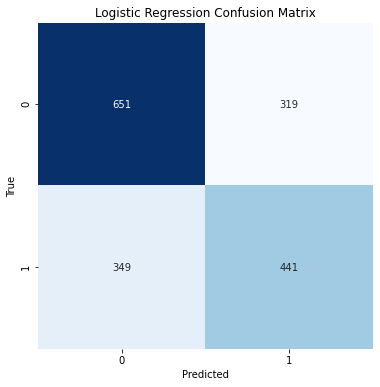

In [406]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_y_pred))
logistic_cm = confusion_matrix(y_test, logistic_y_pred)
plot_confusion_matrix(logistic_cm, "Logistic Regression Confusion Matrix")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       970
           1       0.55      0.54      0.54       790

    accuracy                           0.59      1760
   macro avg       0.59      0.59      0.59      1760
weighted avg       0.59      0.59      0.59      1760



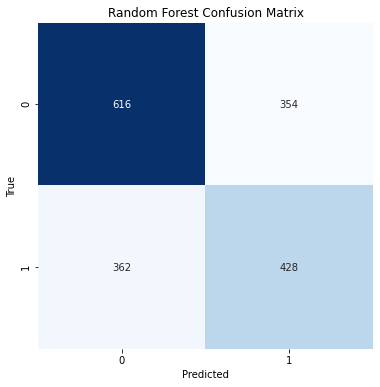

In [407]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
rf_cm = confusion_matrix(y_test, rf_y_pred)
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       970
           1       0.60      0.49      0.54       790

    accuracy                           0.62      1760
   macro avg       0.62      0.61      0.61      1760
weighted avg       0.62      0.62      0.62      1760



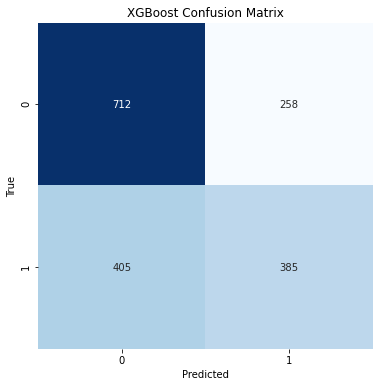

In [408]:
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
plot_confusion_matrix(xgb_cm, "XGBoost Confusion Matrix")

**Visualizing the ROC Curve for all models**

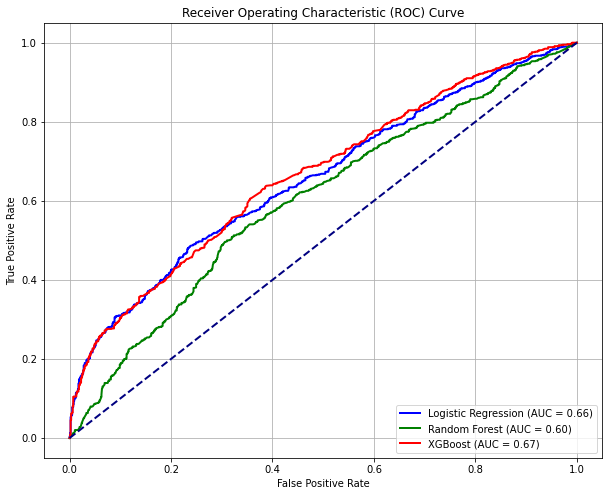

In [409]:
# Compute ROC curve and ROC area for each model
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_y_pred_proba)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_y_pred_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Checking for underfitting or overfitting**

**Logistic Regression**

In [410]:

logistic_y_train_pred = best_logistic_model.predict(X_train)
logistic_y_test_pred = best_logistic_model.predict(X_test)

print("\nLogistic Regression Train Classification Report:")
print(classification_report(y_train, logistic_y_train_pred))
# logistic_train_cm = confusion_matrix(y_train, logistic_y_train_pred)
# plot_confusion_matrix(logistic_train_cm, "Logistic Regression Train Confusion Matrix")

print("\nLogistic Regression Test Classification Report:")
print(classification_report(y_test, logistic_y_test_pred))
# logistic_test_cm = confusion_matrix(y_test, logistic_y_test_pred)
# plot_confusion_matrix(logistic_test_cm, "Logistic Regression Test Confusion Matrix")


Logistic Regression Train Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      3982
           1       0.55      0.57      0.56      3057

    accuracy                           0.61      7039
   macro avg       0.61      0.61      0.61      7039
weighted avg       0.62      0.61      0.62      7039


Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       970
           1       0.58      0.56      0.57       790

    accuracy                           0.62      1760
   macro avg       0.62      0.61      0.61      1760
weighted avg       0.62      0.62      0.62      1760



**Random Forest**

In [411]:
rf_y_train_pred = rf_pipeline.predict(X_train)
rf_y_test_pred = rf_pipeline.predict(X_test)

print("\nRandom Forest Train Classification Report:")
print(classification_report(y_train, rf_y_train_pred))
# rf_train_cm = confusion_matrix(y_train, rf_y_train_pred)
# plot_confusion_matrix(rf_train_cm, "Random Forest Train Confusion Matrix")

print("\nRandom Forest Test Classification Report:")
print(classification_report(y_test, rf_y_test_pred))
# rf_test_cm = confusion_matrix(y_test, rf_y_test_pred)
# plot_confusion_matrix(rf_test_cm, "Random Forest Test Confusion Matrix")



Random Forest Train Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3982
           1       0.84      0.87      0.85      3057

    accuracy                           0.87      7039
   macro avg       0.87      0.87      0.87      7039
weighted avg       0.87      0.87      0.87      7039


Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       970
           1       0.55      0.54      0.54       790

    accuracy                           0.59      1760
   macro avg       0.59      0.59      0.59      1760
weighted avg       0.59      0.59      0.59      1760



**XGBOOST**

In [412]:
xgb_y_train_pred = xgb_pipeline.predict(X_train)
xgb_y_test_pred = xgb_pipeline.predict(X_test)

print("\nXGBoost Train Classification Report:")
print(classification_report(y_train, xgb_y_train_pred))
# xgb_train_cm = confusion_matrix(y_train, xgb_y_train_pred)
# plot_confusion_matrix(xgb_train_cm, "XGBoost Train Confusion Matrix")

print("\nXGBoost Test Classification Report:")
print(classification_report(y_test, xgb_y_test_pred))
# xgb_test_cm = confusion_matrix(y_test, xgb_y_test_pred)
# plot_confusion_matrix(xgb_test_cm, "XGBoost Test Confusion Matrix")


XGBoost Train Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      3982
           1       0.60      0.53      0.56      3057

    accuracy                           0.64      7039
   macro avg       0.64      0.63      0.63      7039
weighted avg       0.64      0.64      0.64      7039


XGBoost Test Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       970
           1       0.60      0.49      0.54       790

    accuracy                           0.62      1760
   macro avg       0.62      0.61      0.61      1760
weighted avg       0.62      0.62      0.62      1760



**Feature importance for the best performing model**

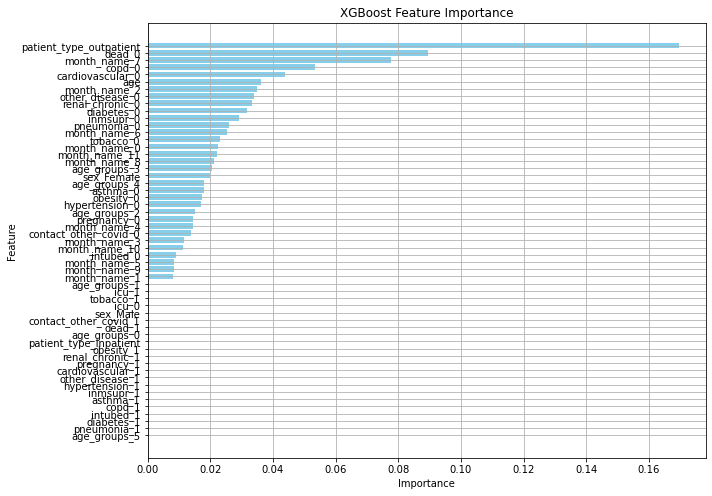

In [413]:
# Function to get more descriptive feature names
def get_descriptive_feature_names(ohe, numeric_features, categorical_features, original_features):
    one_hot_encoded_feature_names = ohe.get_feature_names(categorical_features)
    new_feature_names = []
    
    for feature in one_hot_encoded_feature_names:
        if 'sex_' in feature:
            if feature.endswith('_0'):
                new_feature_names.append('sex_Female')
            elif feature.endswith('_1'):
                new_feature_names.append('sex_Male')
        elif 'patient_type_' in feature:
            if feature.endswith('_0'):
                new_feature_names.append('patient_type_outpatient')
            elif feature.endswith('_1'):
                new_feature_names.append('patient_type_inpatient')
        elif 'date_symptoms_' in feature:
            # Extract the month part from the feature name
            month = feature.split('_')[-1]
            new_feature_names.append(f'month_{month}')
        else:
            base_feature, value = feature.rsplit('_', 1)
            new_feature_names.append(f"{base_feature}_{value}")

    return numeric_features + new_feature_names

# Get the XGBoost model from the pipeline
xgb_clf = xgb_pipeline.named_steps['classifier']

# Get the feature importance from the XGBoost model
xgb_feature_importance = xgb_clf.feature_importances_

# Get the original feature names after one-hot encoding
categorical_encoder = xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat']
features = get_descriptive_feature_names(categorical_encoder, numeric_features, categorical_features, X.columns)

# Create a DataFrame to store feature names and their corresponding importances
xgb_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_feature_importance})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance for XGBoost
plt.figure(figsize=(10, 8))
plt.barh(xgb_feature_importance_df['Feature'], xgb_feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
